# Machine Learning - Linear Regression Example - Yiannis Pitsillides

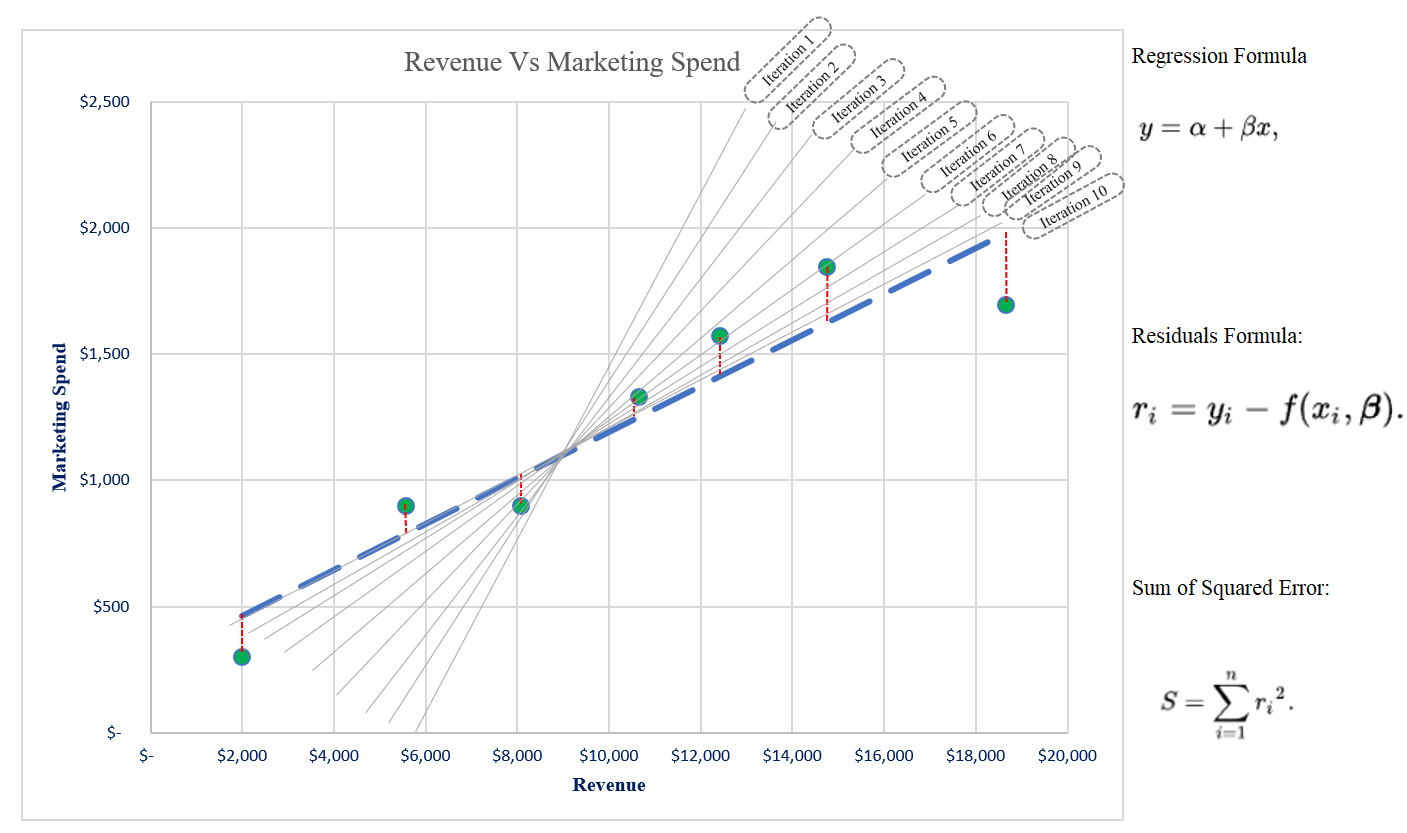

In [28]:
import os
from IPython.display import Image
PATH = "F:\\Github\\Python tutorials\\Introduction to ML - LR model\\"
Image(filename = PATH + "Regression Example.png", width=900, height=900)

## Tutorial Overview:

### Video 1:
1. What is Machine Learning
2. What is the ML Process
3. Problem Formulation
4. Loading the raw data
5. Data Pre-processing:
    - Cleaning
    - Distributions
    - Vizualizations
    - Transformations
    - Feature Engineering
6. Spliting the data
7. Running Regression
8. Evaluation Metrics

### Video 2:
9. Next steps
    - REL - Feature Elimination Selection
    - RFR - Random Forest Regressor
    - XGBoost
    - NNR - Neural Net Regression
    - Deploying Results - Power BI Dashboard
  

## 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)
- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions
- ML is a subset of Artificial Intelligence

## 2. The Machine Learning Process

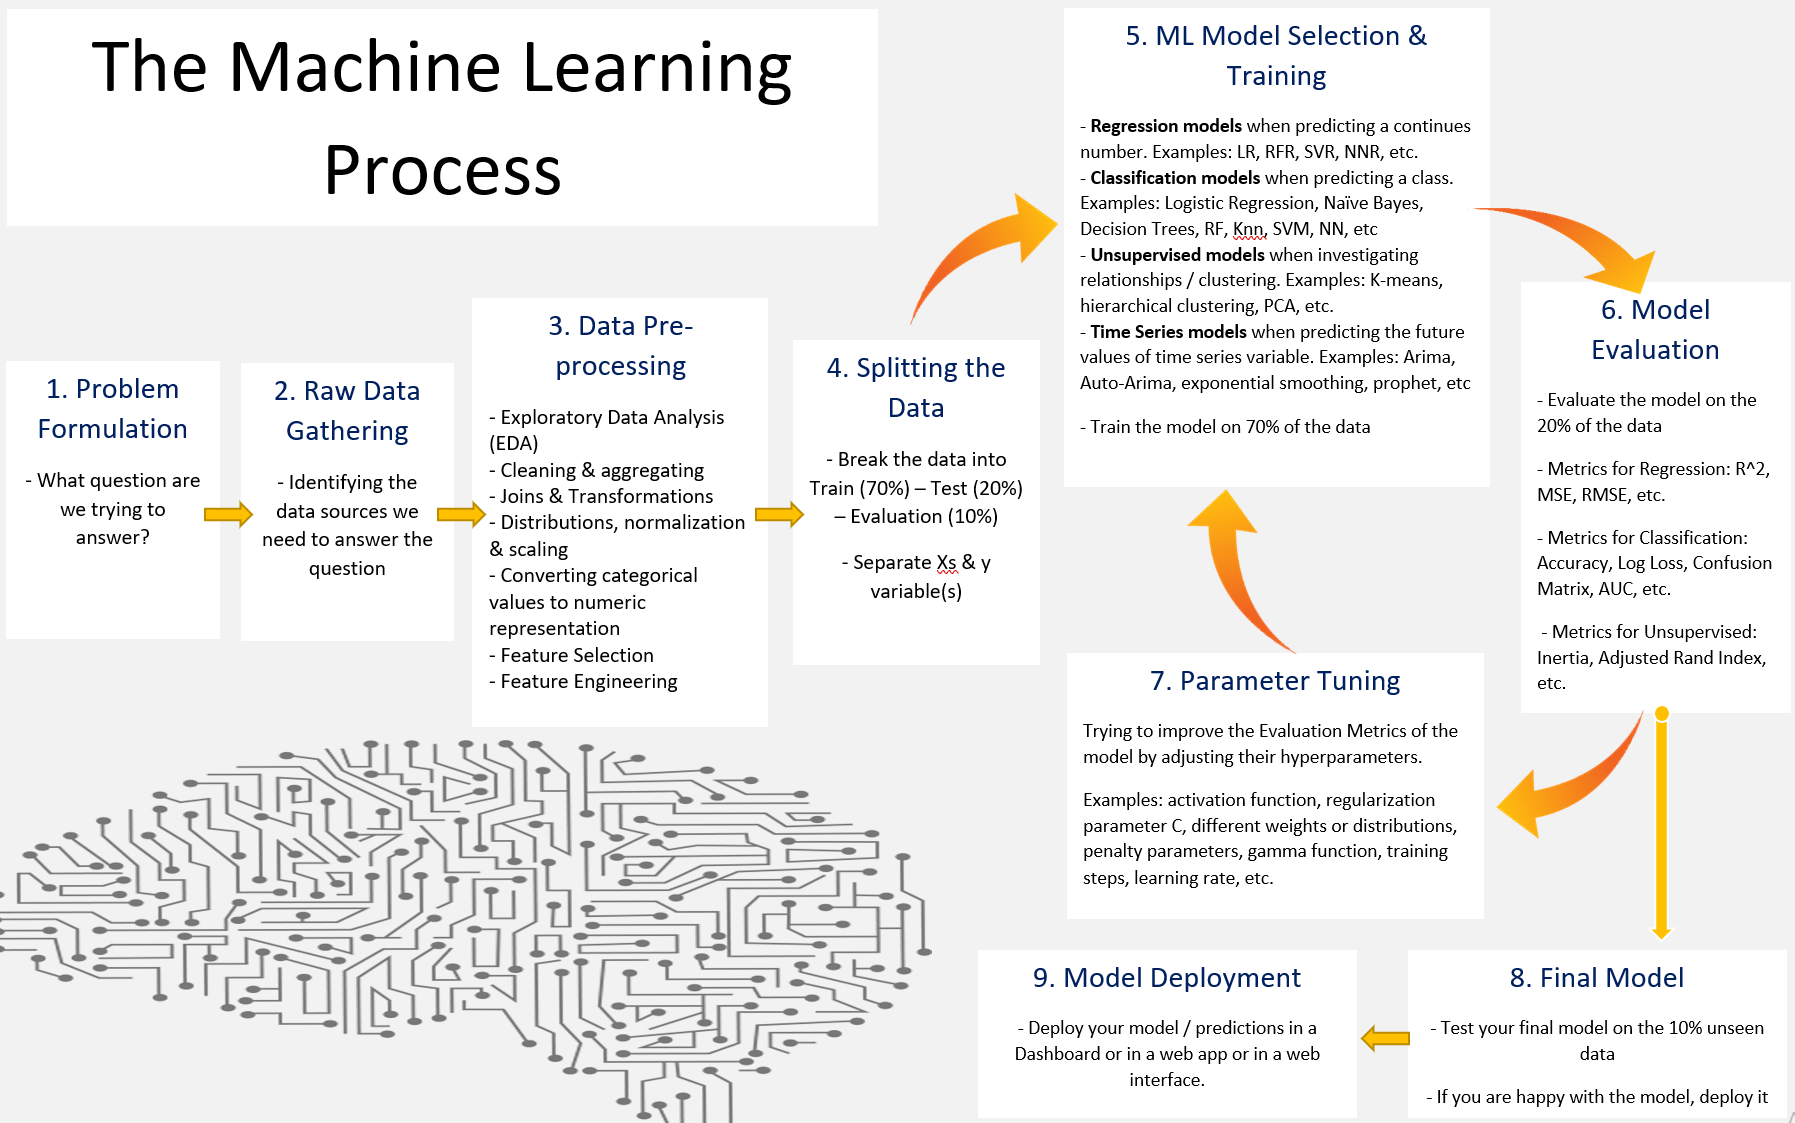

In [29]:
PATH = "C:\\Users\\pitsi\Desktop\\Python tutorials\\2022 Python Tutorial\\2. Linear Regression\\"
Image(filename = PATH + "ML Process.png", width=900, height=900)

## 3. Problem Formulation

- We want to understnad the factors that affect the car prices
- We want to be able to predict car prices based on our data/variables

In [30]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import sys
# !conda list Check the packages installed

## 4. Loading the Raw Data

In [31]:
# Loading the data
raw_data = pd.read_csv('C:\\Users\\pitsi\\Desktop\\Python Tutorials\\2022 Python Tutorial\\2. Linear Regression\\CarPrice_Assignment.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

#raw data: https://www.kaggle.com/datasets/shaistashaikh/carprice-assignment

(205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

# 5. Data Preprocessing

## 5.1. EDA 

In [32]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

## 5.2. Checking for NULL Values

In [33]:
# Checking for null values

raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Ways of dealing with missing data
- Delete the whole observation
- Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [34]:
# manually creating null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

# updating with the mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

raw_data.head(10)

C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   
5        sedan        fwd          front       99.8      177.3      66.3   
6        sedan        fwd          front      105.8      192.7      71.4   
7        wagon        fwd          front      105.8      192.7      71.4   
8        sedan        fwd          front      105.8      192.7      71.4   
9    hatchback        4wd          front       99.5      178.2      67.9   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   
5       53.1        2507        ohc           five         136       mpfi   
6       55.7        2844        ohc           five         136       mpfi   
7       55.7        2954        ohc           five         136       mpfi   
8       55.9        3086        ohc           five         131       mpfi   
9       52.0        3053        ohc           five         131       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   
5       3.19    3.40               8.5         110     5500       19   
6       3.19    3.40               8.5         110     5500       19   
7       3.19    3.40               8.5         110     5500       19   
8       3.13    3.40               8.3         140     5500       17   
9       3.13    3.40               7.0         160     5500       16   

   highwaympg      price       price 2  
0          27  13495.000  13243.716173  
1          27  16500.000  13243.716173  
2          26  16500.000  13243.716173  
3          30  13950.000  13950.000000  
4          22  17450.000  17450.000000  
5          25  15250.000  15250.000000  
6          25  17710.000  17710.000000  
7          25  18920.000  18920.000000  
8          20  23875.000  23875.000000  
9          22  17859.167  17859.167000

In [35]:
# manually creating null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

# Deleting the NULL values
#raw_data = raw_data.dropna(subset = ['price 2'])

# updating with the mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

# dropping the column
del raw_data['price 2']

raw_data.head()

C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

## 5.3. Investigating the numeric values with scatterplots

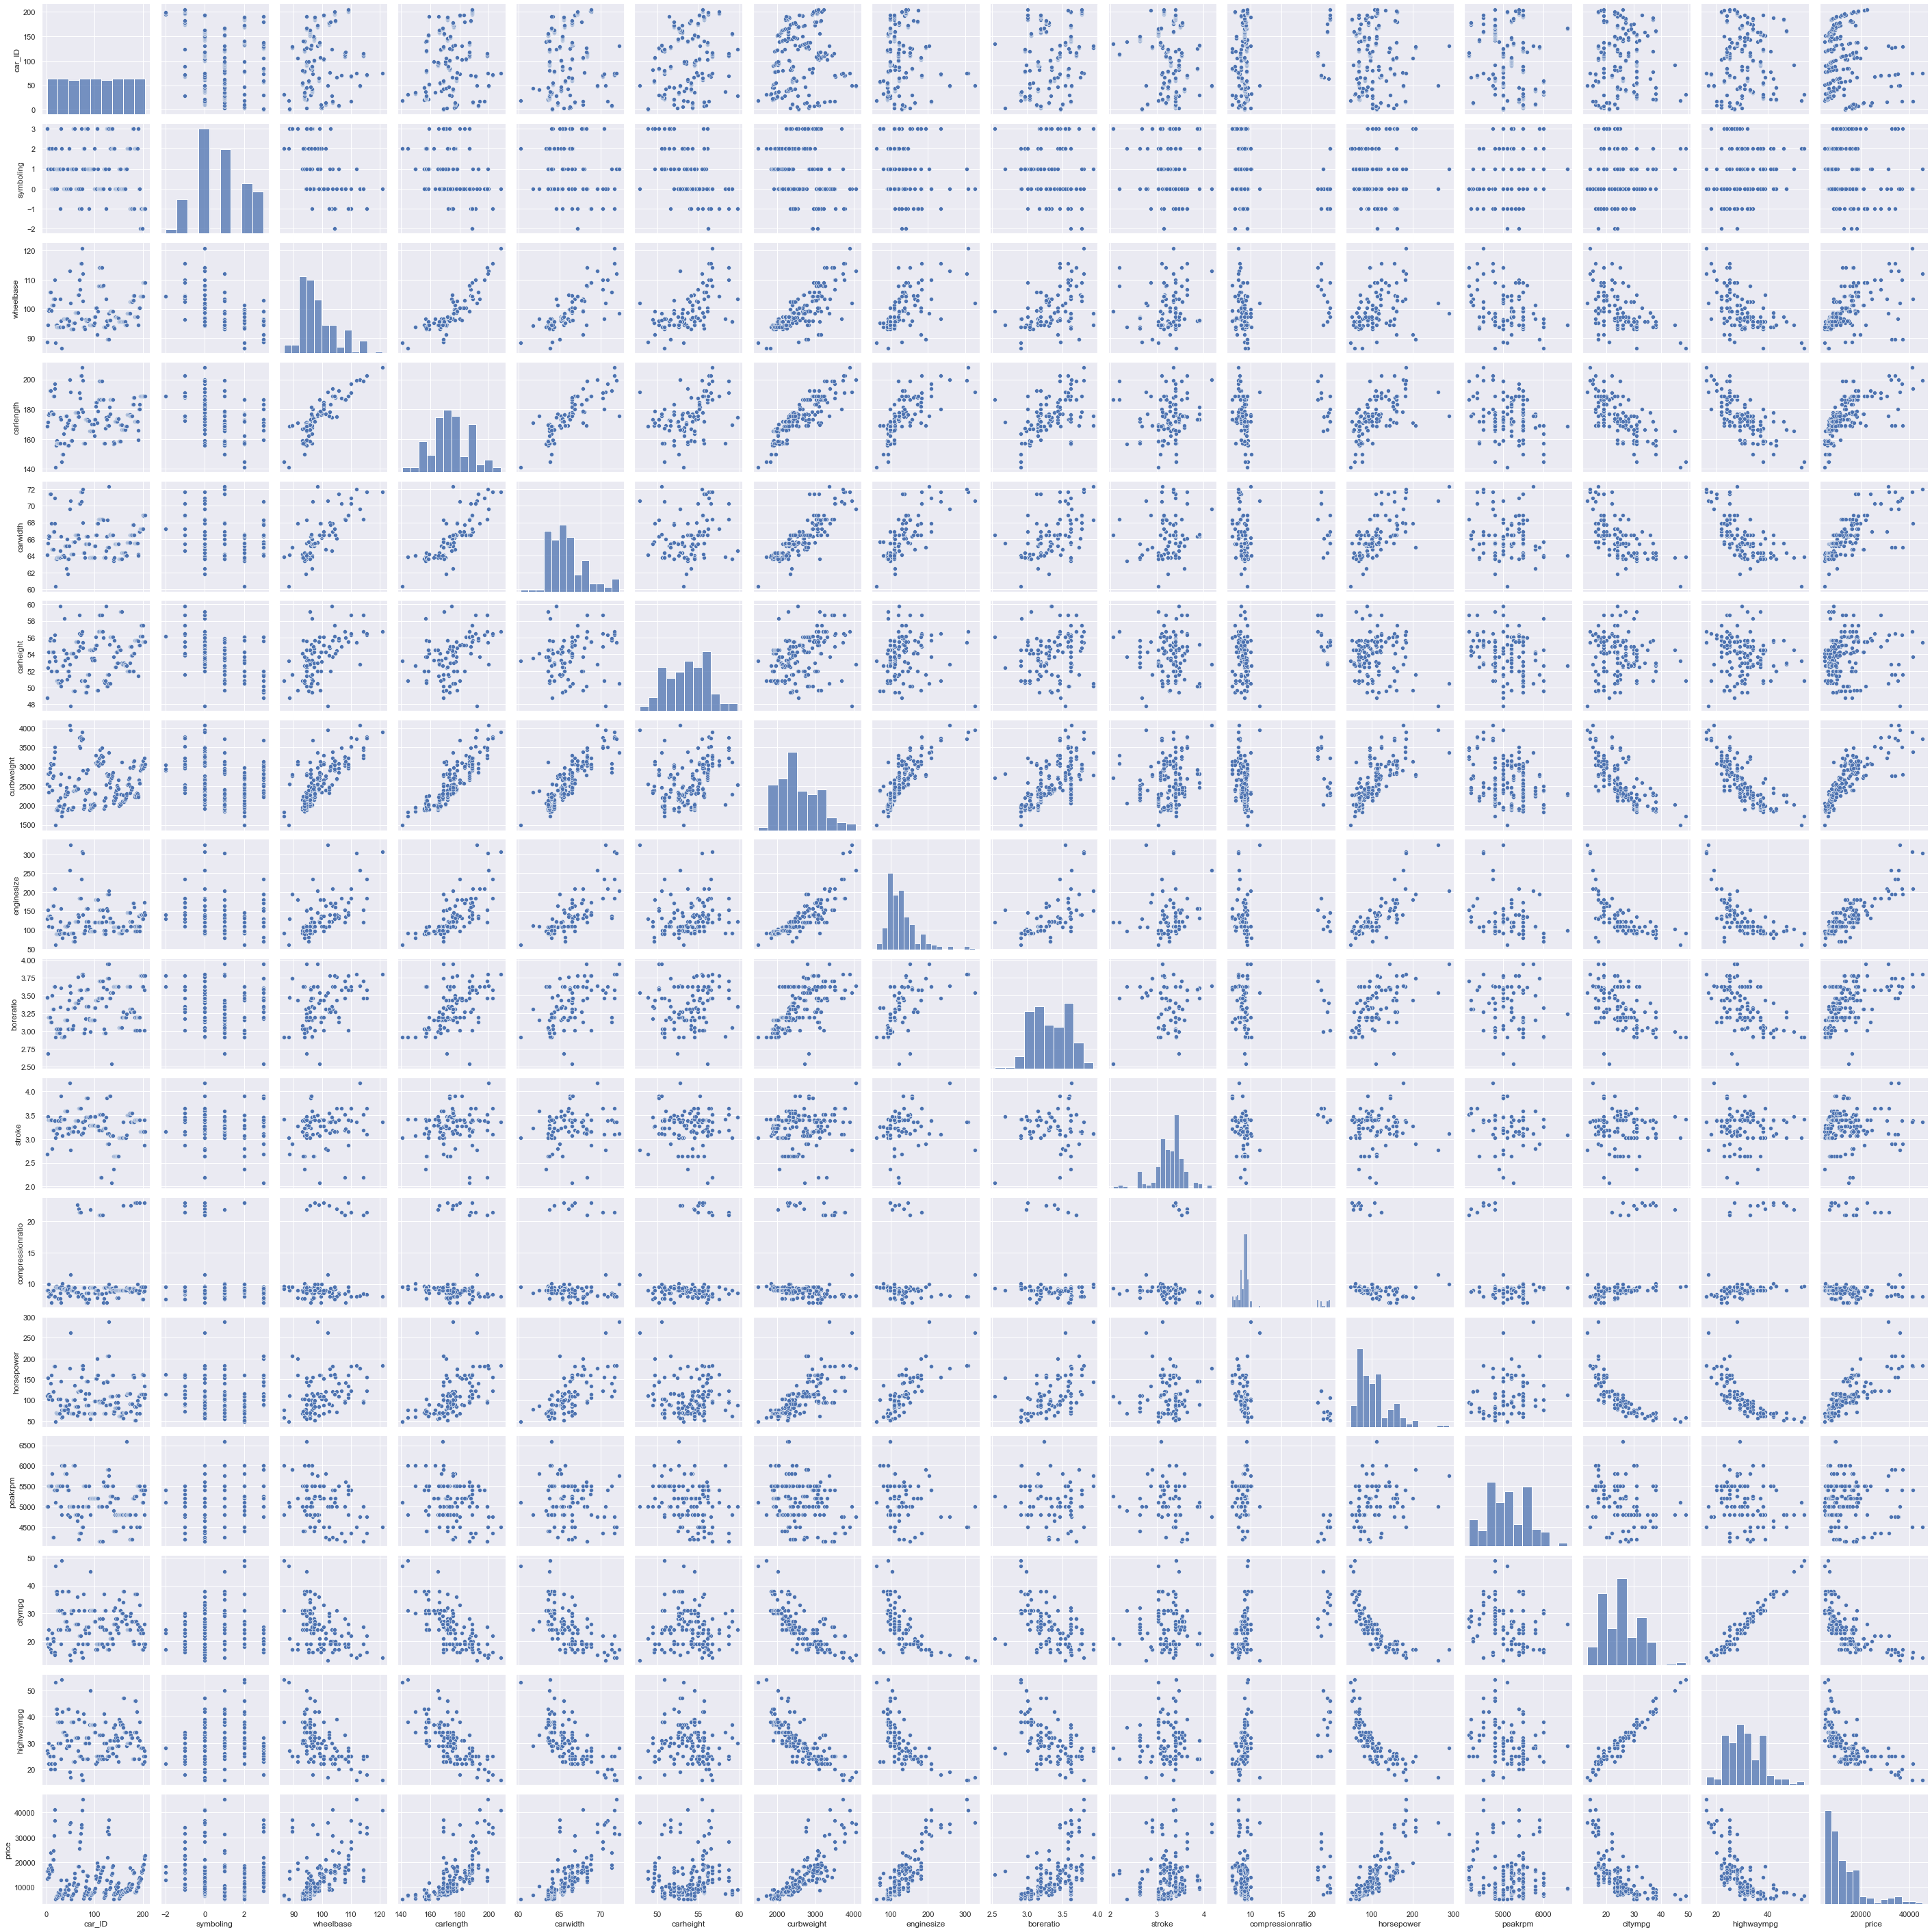

In [36]:
# Example 1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

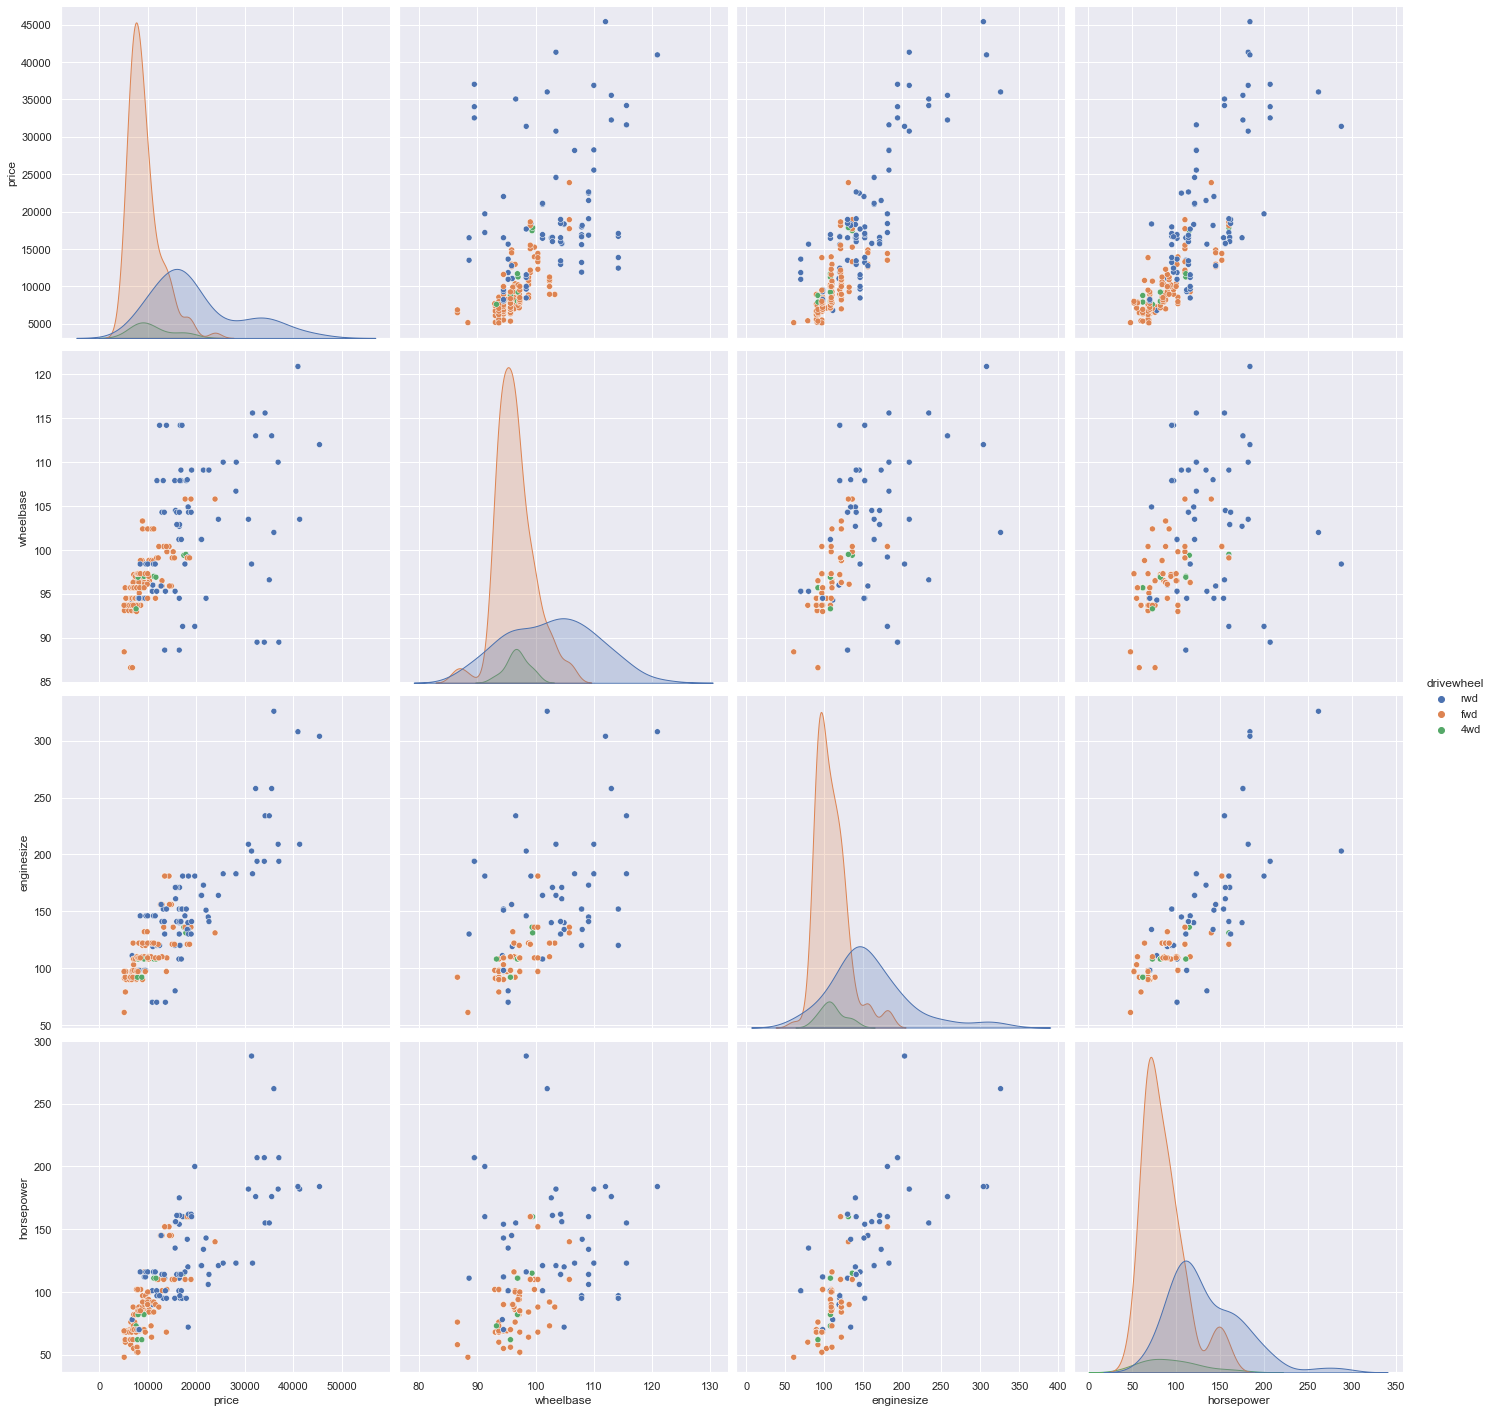

In [37]:
# Example 2 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

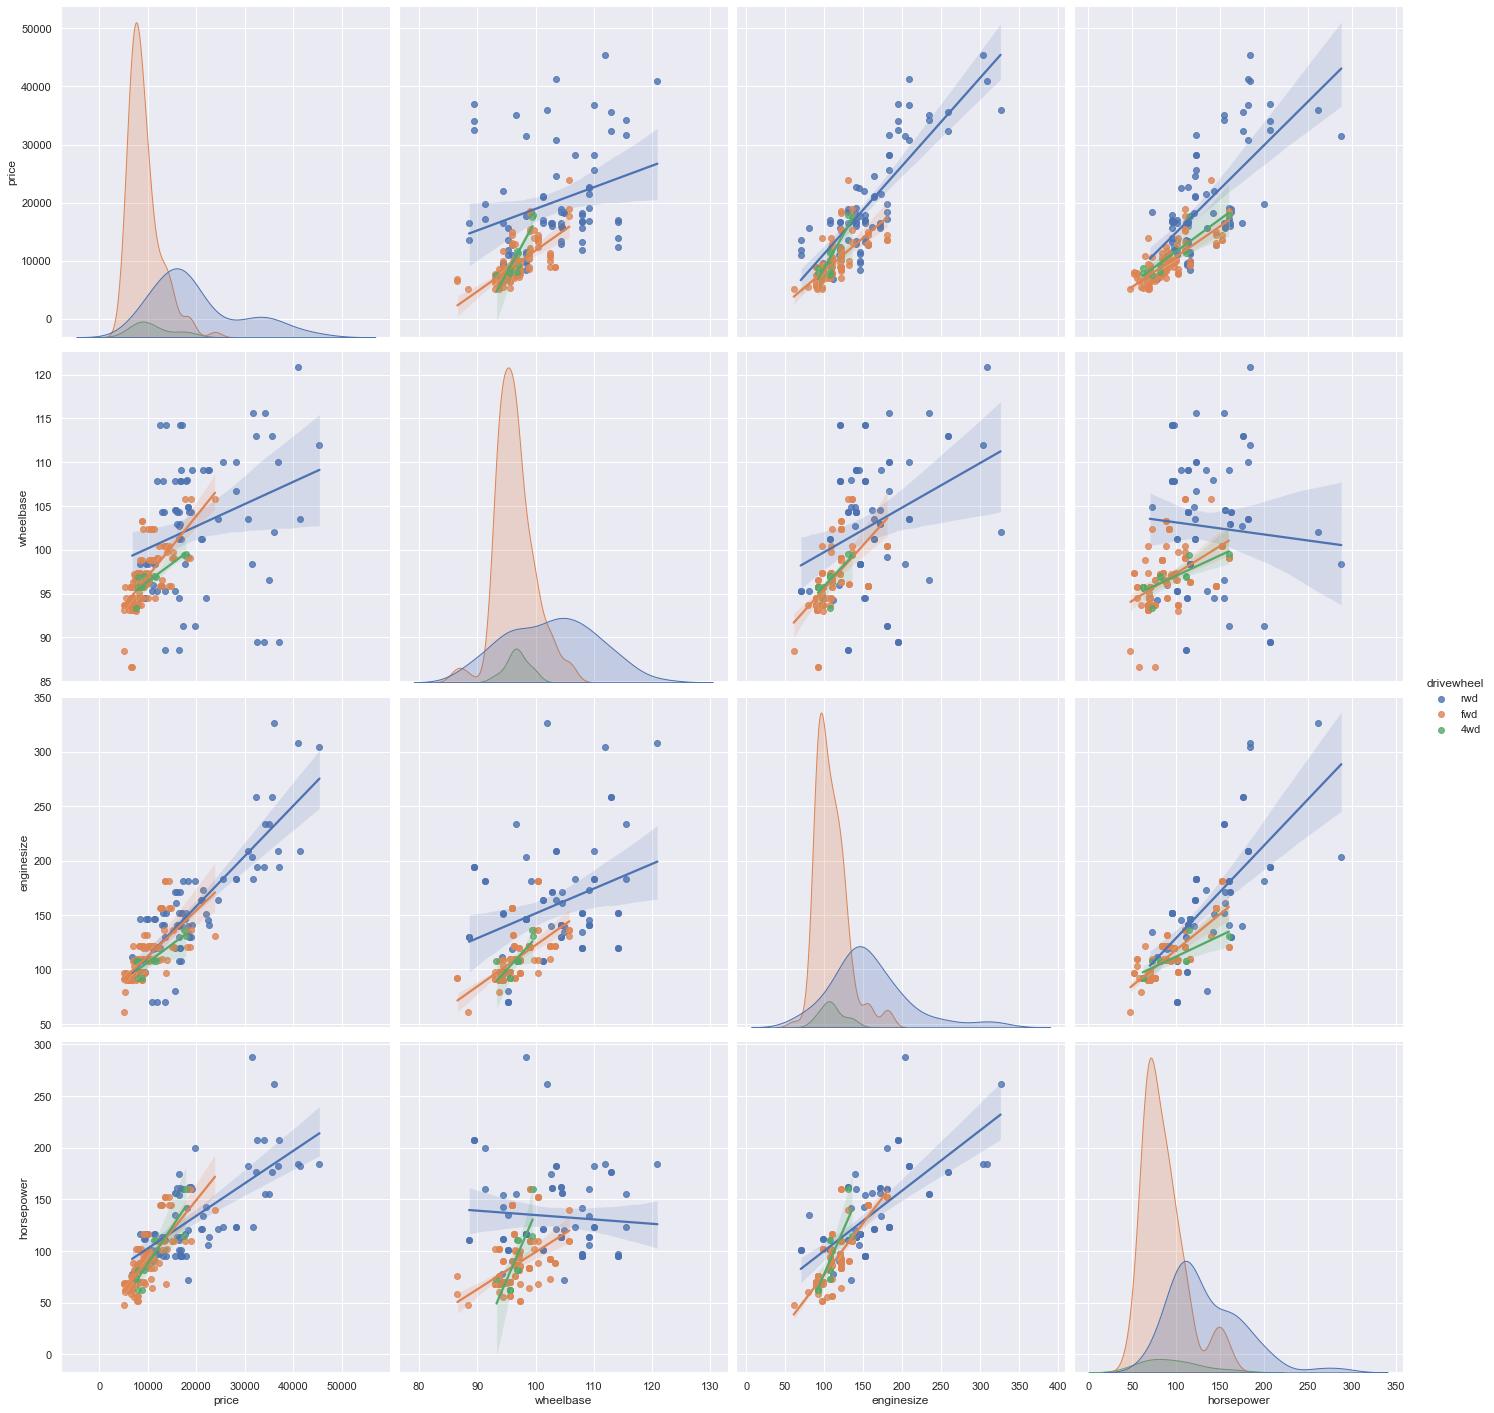

In [38]:
# Example 3 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

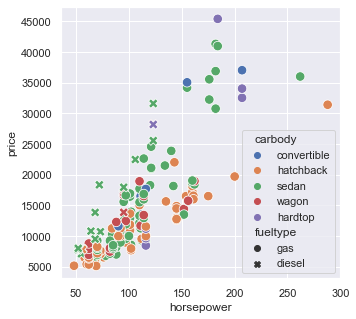

In [39]:
# Example 4 - Relationship between price and horsepower by carbody

ax = sns.scatterplot(x="horsepower", y="price", data=raw_data, hue = 'carbody', style = 'fueltype', s=90)

## 5.4. Investigating the categorical data

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

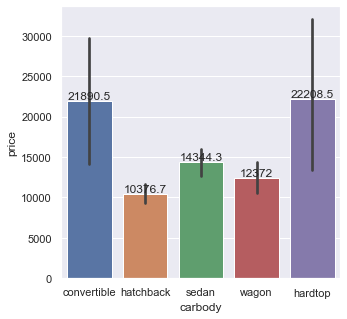

In [40]:
# Example 5 - Average price by carbody

ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

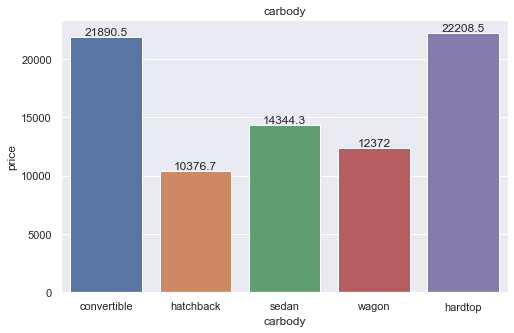

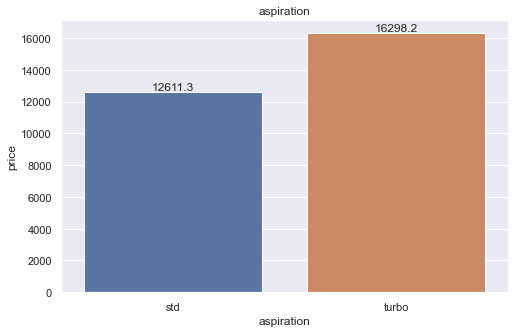

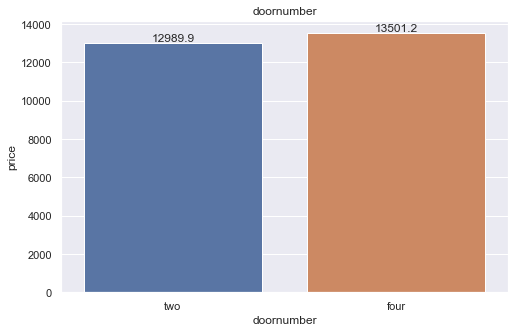

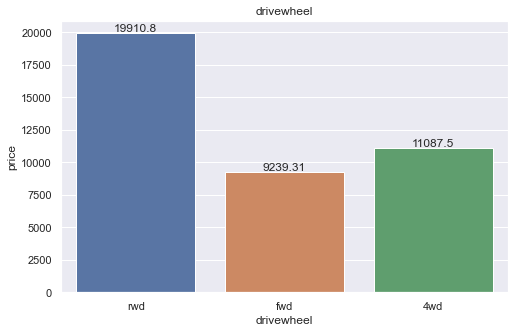

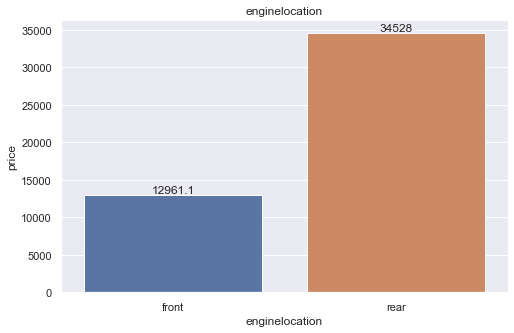

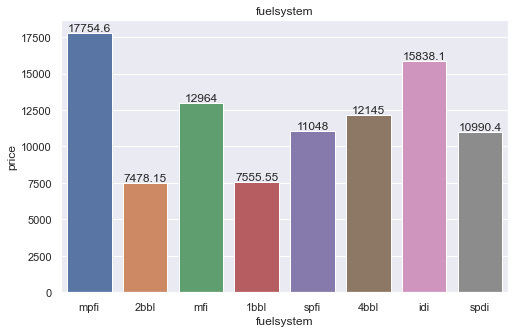

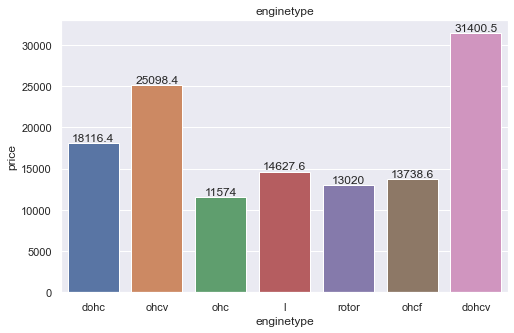

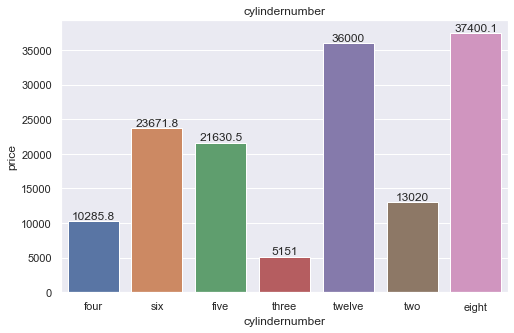

In [41]:
# Example 6 - Total price by carbody for multible categories

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

## 5.5. Investigating the distributions with disti plots

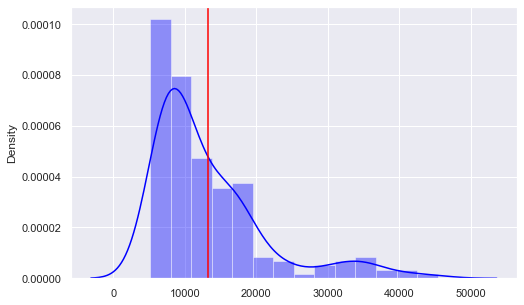

In [42]:
# Example 7 - Investigating the distribution of price, adding the mean

x = raw_data['price'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['price'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

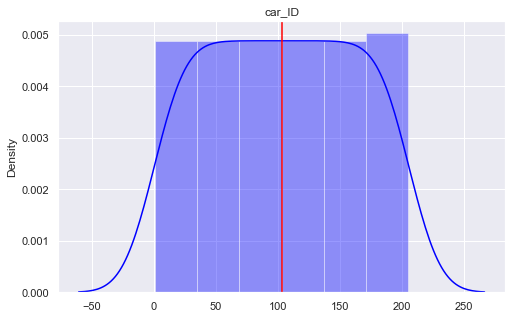

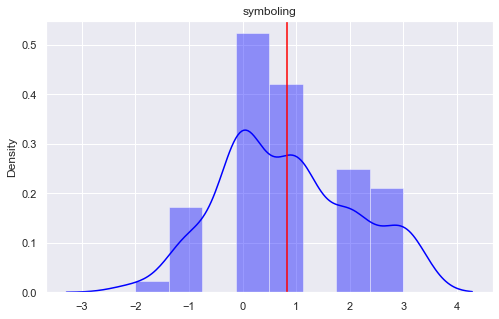

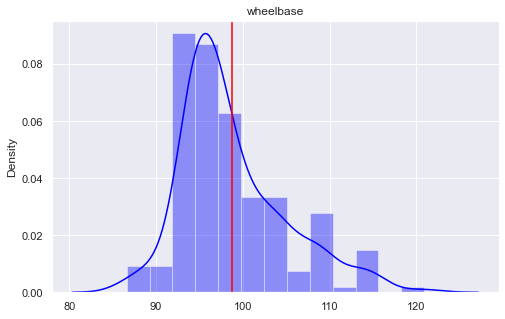

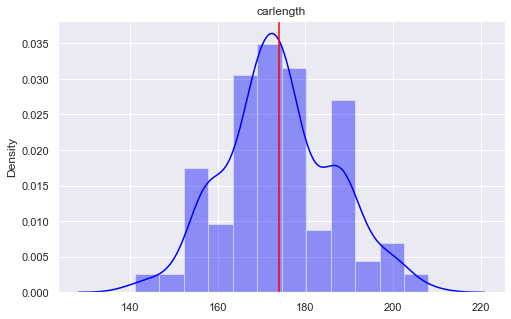

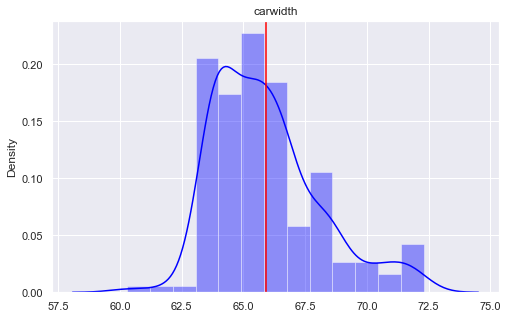

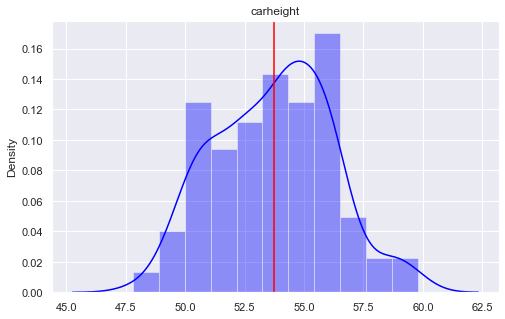

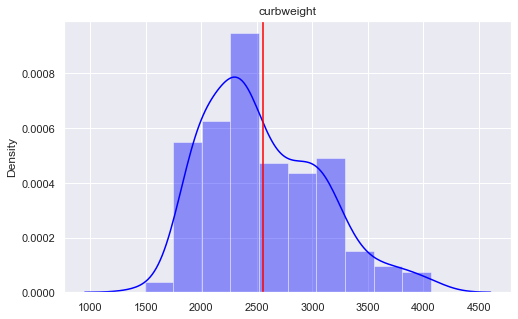

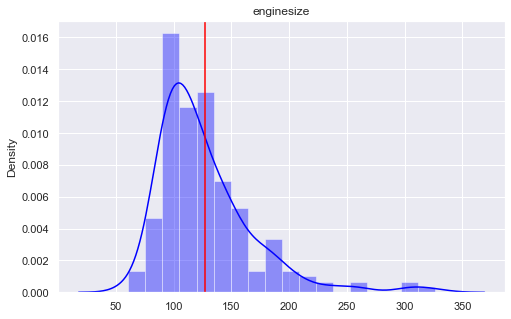

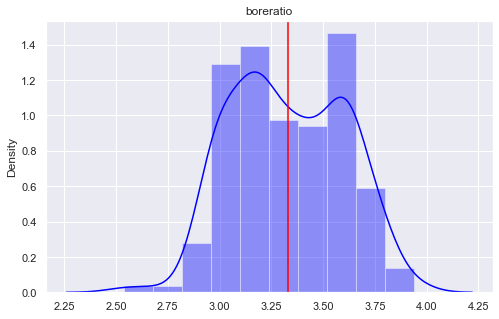

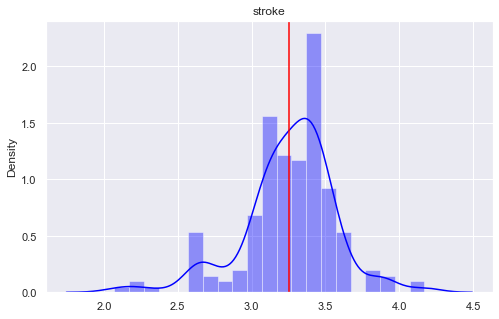

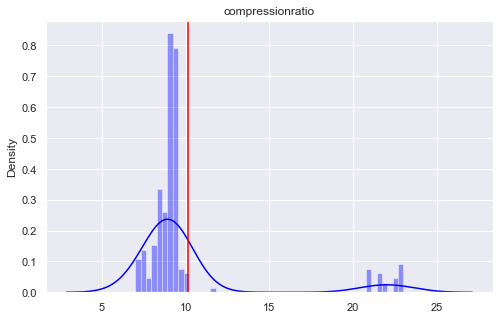

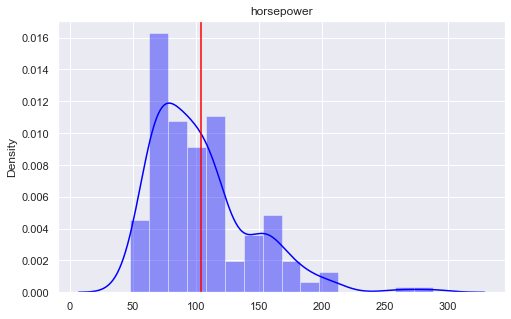

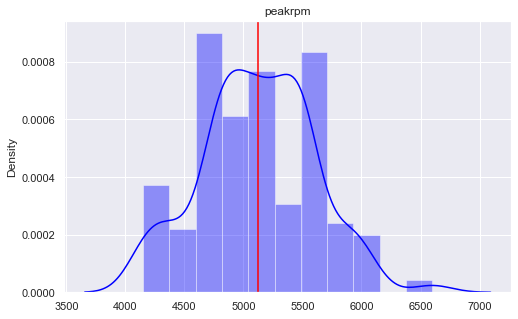

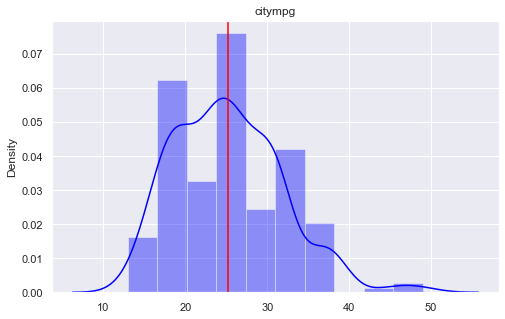

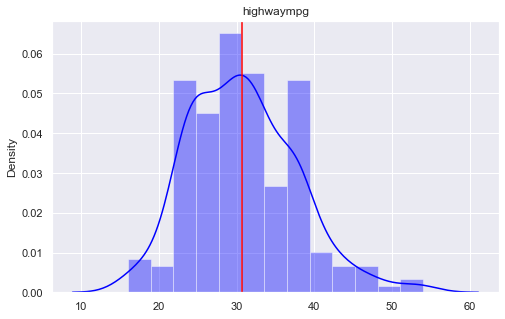

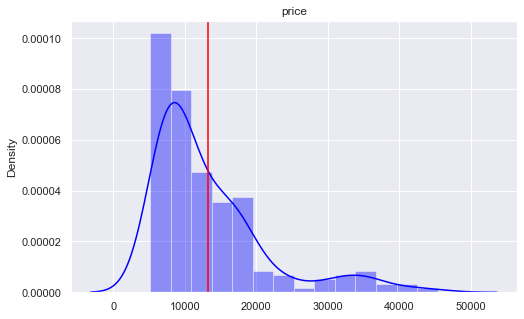

In [43]:
# Example 8 - Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [44]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 5.6. Investigating the distribution and outliers with Box plots

The meadian is:  10295.0


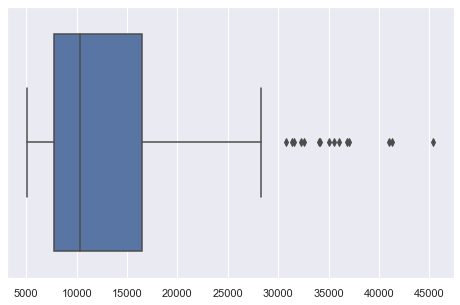

In [45]:
# Example 9 - Investigating the distribution of Price

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', raw_data['price'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

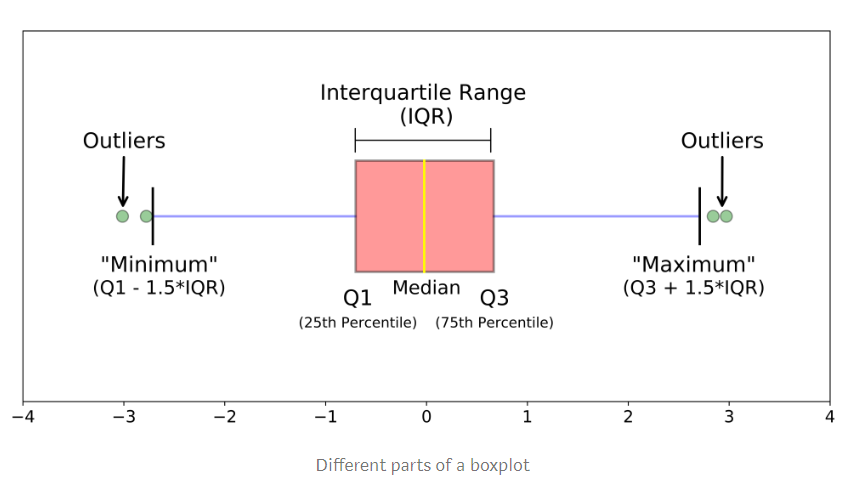

In [46]:
# More Details

PATH = "F:\\Github\\Python tutorials\\Introduction to Seaborn\\"
Image(filename = PATH + "Seaborn boxplot.png", width=900, height=900)

# More details here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
# Credits: Michael Galarnyk

The meadian is:  103.0


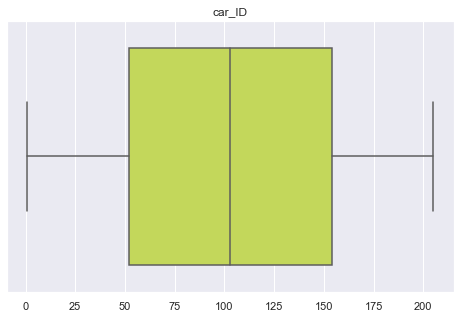

The meadian is:  1.0


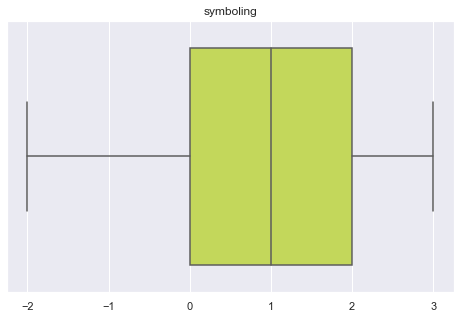

The meadian is:  97.0


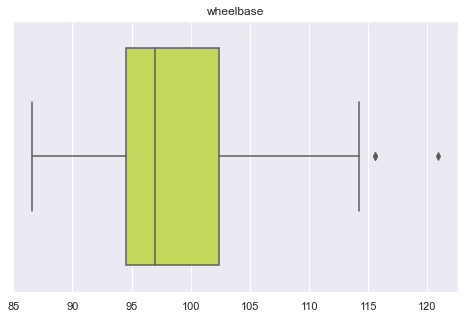

The meadian is:  173.2


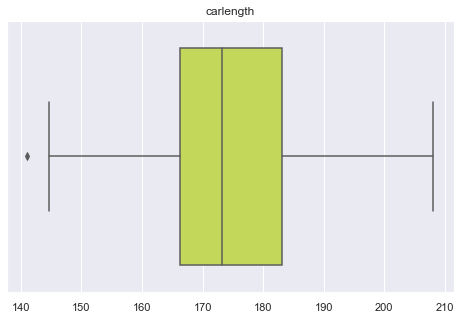

The meadian is:  65.5


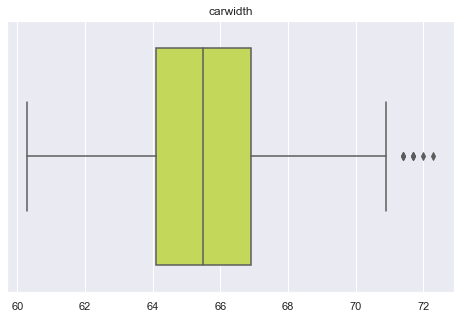

The meadian is:  54.1


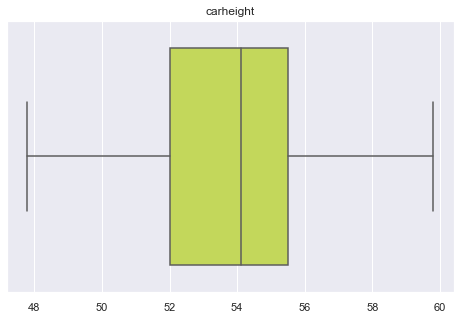

The meadian is:  2414.0


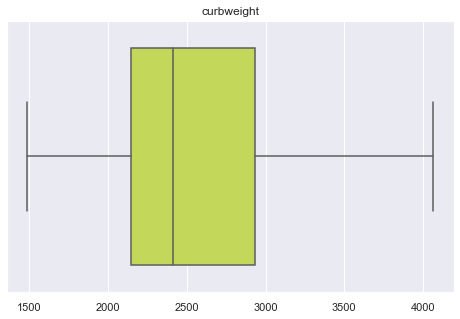

The meadian is:  120.0


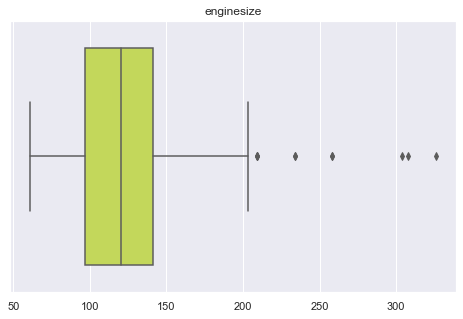

The meadian is:  3.31


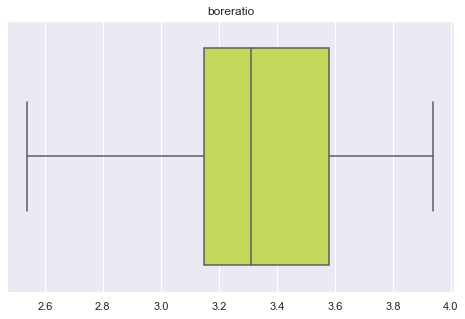

The meadian is:  3.29


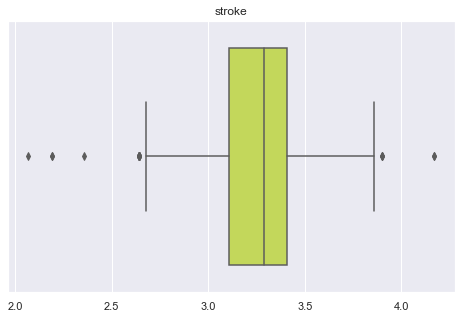

The meadian is:  9.0


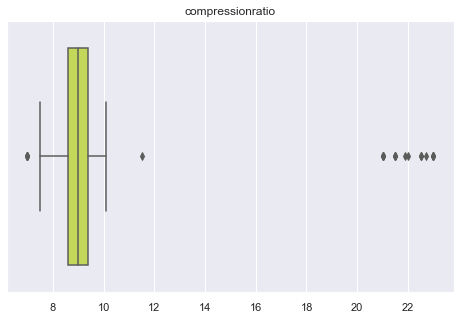

The meadian is:  95.0


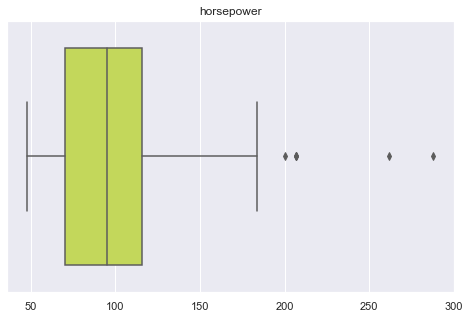

The meadian is:  5200.0


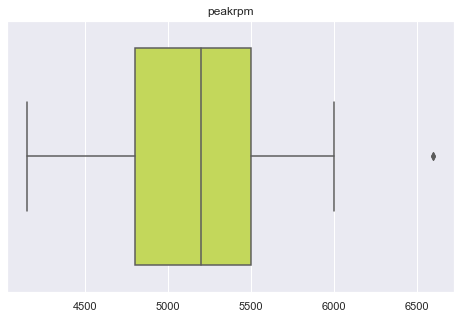

The meadian is:  24.0


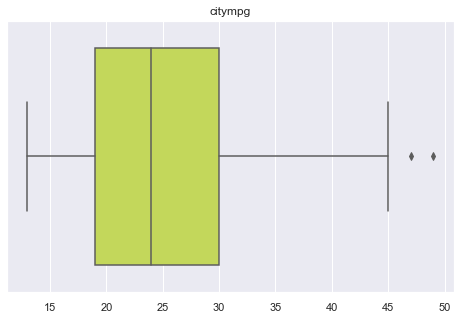

The meadian is:  30.0


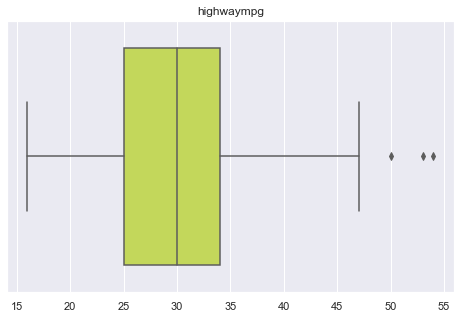

The meadian is:  10295.0


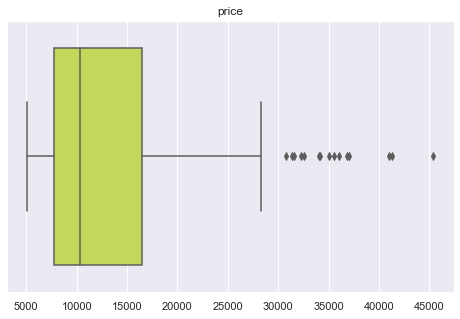

In [47]:
# Example 10 - Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

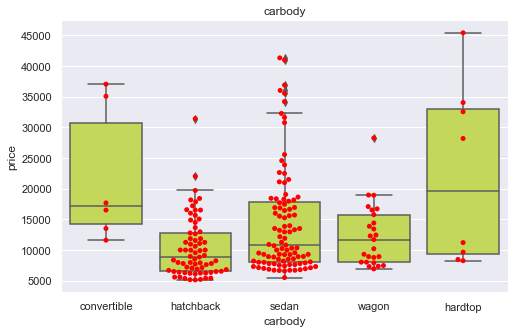

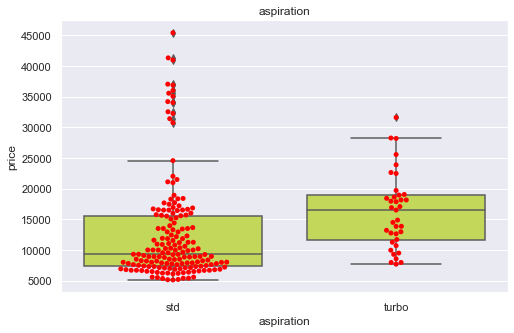

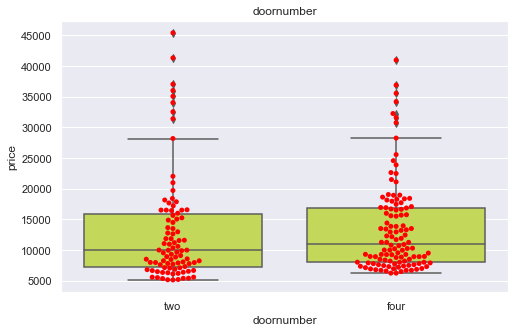

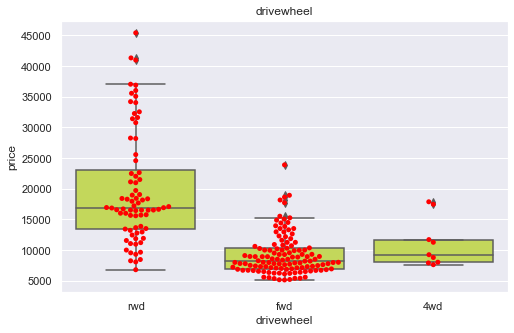

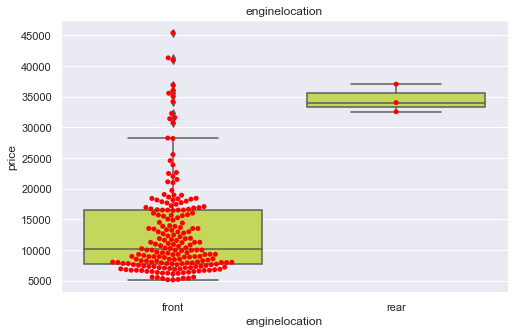

C:\Users\pitsi\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


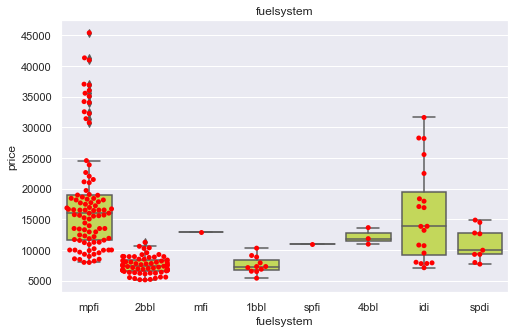

C:\Users\pitsi\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


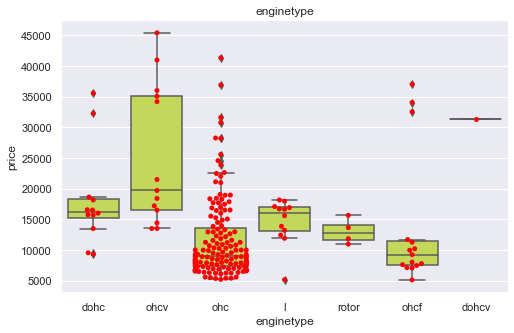

C:\Users\pitsi\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


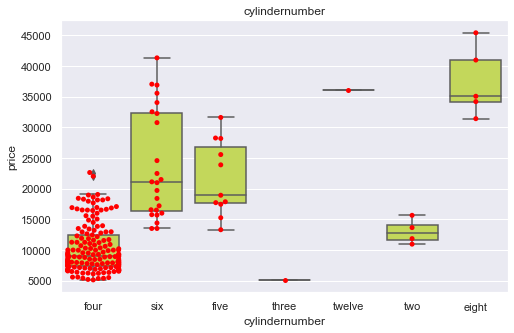

In [48]:
# Example 11 - Investigating the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()

## 5.7. Converting the categorical values into numerical representation

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [51]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548           four         130       3.47   
1      64.1       48.8        2548           four         130       3.47   
2      65.5       52.4        2823            six         152       2.68   
3      66.2       54.3        2337           four         109       3.19   
4      66.4       54.3        2824           five         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginet

In [133]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


car_ID                    int32
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

In [53]:
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548               4         130       3.47   
1      64.1       48.8        2548               4         130       3.47   
2      65.5       52.4        2823               6         152       2.68   
3      66.2       54.3        2337               4         109       3.19   
4      66.4       54.3        2824               5         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  e

## 5.8. Selecting the important features

### Heatmap

- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

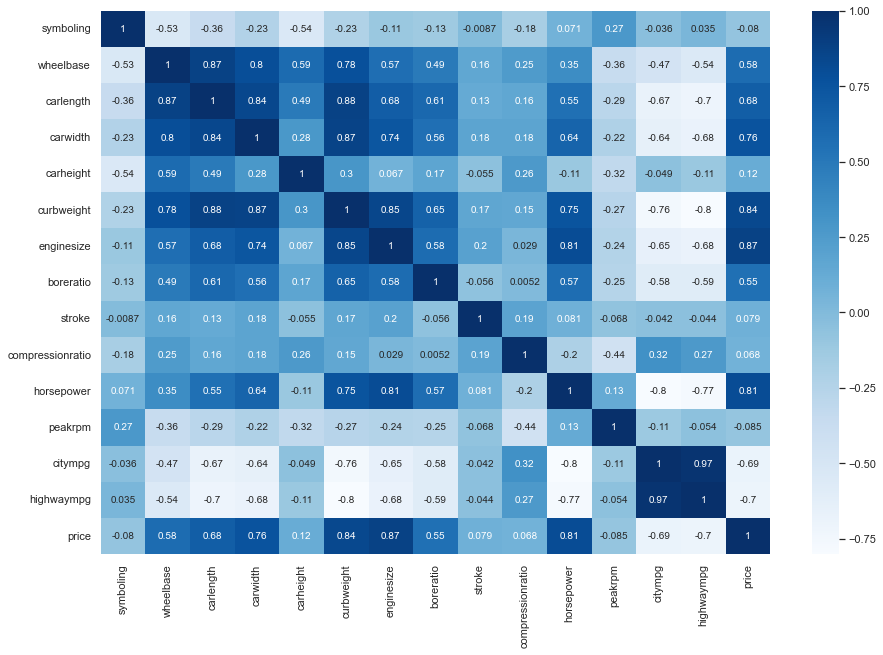

In [83]:
# Example 12 - Heatmap 

# droping columns we don't need
#del new_raw_data['car_ID']
del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [84]:
new_raw_data.dtypes

symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelocation_rear       uint8
fuelsystem_1bbl           uint8
fuelsyst

### Feature Importance

Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests)
- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature
- More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [85]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 46)
(205,)


In [86]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [87]:
dt.feature_importances_

array([0.002621, 0.101383, 0.067869, 0.023265, 0.108850, 0.276795,
       0.006323, 0.041932, 0.050348, 0.017398, 0.031393, 0.097189,
       0.028420, 0.019693, 0.030768, 0.000000, 0.003115, 0.010162,
       0.018708, 0.001310, 0.004426, 0.000000, 0.005736, 0.006323,
       0.000000, 0.005736, 0.001310, 0.000000, 0.000000, 0.000000,
       0.009173, 0.000000, 0.000000, 0.000000, 0.011110, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.013401, 0.000000,
       0.000000, 0.000000, 0.001310, 0.003931])

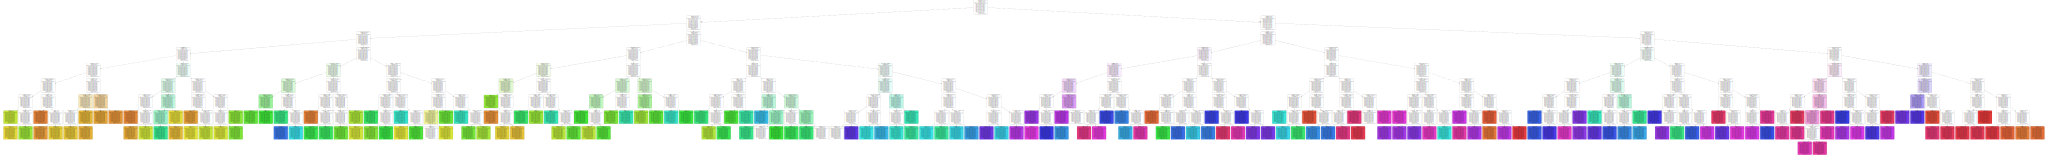

In [88]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('price', axis=1).columns,    
    class_names=new_raw_data['price'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [90]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature symboling:, 0.003
Importance of feature wheelbase:, 0.101
Importance of feature carlength:, 0.068
Importance of feature carwidth:, 0.023
Importance of feature carheight:, 0.109
Importance of feature curbweight:, 0.277
Importance of feature cylindernumber:, 0.006
Importance of feature enginesize:, 0.042
Importance of feature boreratio:, 0.050
Importance of feature stroke:, 0.017
Importance of feature compressionratio:, 0.031
Importance of feature horsepower:, 0.097
Importance of feature peakrpm:, 0.028
Importance of feature citympg:, 0.020
Importance of feature highwaympg:, 0.031
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.003
Importance of feature carbody_hatchback:, 0.010
Importance of feature carbody_sedan:, 0.019
Importance of feature carbody_wagon:, 0.001
Importance of feature aspiration_std:, 0.004
Importance of feature aspiration_turbo:, 0.000
Importance of feature doornumber_four:, 0.006
Importance of feature 

index              Variable  Feature Importance Score
0       5            curbweight                  0.276795
1       4             carheight                  0.108850
2       1             wheelbase                  0.101383
3      11            horsepower                  0.097189
4       2             carlength                  0.067869
5       8             boreratio                  0.050348
6       7            enginesize                  0.041932
7      10      compressionratio                  0.031393
8      14            highwaympg                  0.030768
9      12               peakrpm                  0.028420
10      3              carwidth                  0.023265
11     13               citympg                  0.019693
12     18         carbody_sedan                  0.018708
13      9                stroke                  0.017398
14     40        enginetype_ohc                  0.013401
15     34       fuelsystem_mpfi                  0.011110
16     17     carbody_hatchback                  0.010162
17     30       fuelsystem_2bbl                  0.009173
18     23        doornumber_two                  0.006323
19      6        cylindernumber                  0.006323
20     25        drivewheel_fwd                  0.005736
21     22       doornumber_four                  0.005736
22     20        aspiration_std                  0.004426
23     45          fueltype_gas                  0.003931
24     16       carbody_hardtop                  0.003115
25      0             symboling                  0.002621
26     26        drivewheel_rwd                  0.001310
27     44       fueltype_diesel                  0.001310
28     19         carbody_wagon                  0.001310
29     37       enginetype_dohc                  0.000000
30     43      enginetype_rotor                  0.000000
31     42       enginetype_ohcv                  0.000000
32     41       enginetype_ohcf                  0.000000
33     15   carbody_convertible                  0.000000
34     39          enginetype_l                  0.000000
35     38      enginetype_dohcv                  0.000000
36     24        drivewheel_4wd                  0.000000
37     36       fuelsystem_spfi                  0.000000
38     21      aspiration_turbo                  0.000000
39     33        fuelsystem_mfi                  0.000000
40     32        fuelsystem_idi                  0.000000
41     31       fuelsystem_4bbl                  0.000000
42     29       fuelsystem_1bbl                  0.000000
43     28   enginelocation_rear                  0.000000
44     27  enginelocation_front                  0.000000
45     35       fuelsystem_spdi                  0.000000

## 6. Splitting the Raw Data - Hold-out validation

In [91]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(164, 46)
(41, 46)
(164,)
(41,)


## 7. What is Linear Regression Analysis
- Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes
- It models the relationship of 2 plus variables by fitting a linear equation to observed data
- In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
- Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data

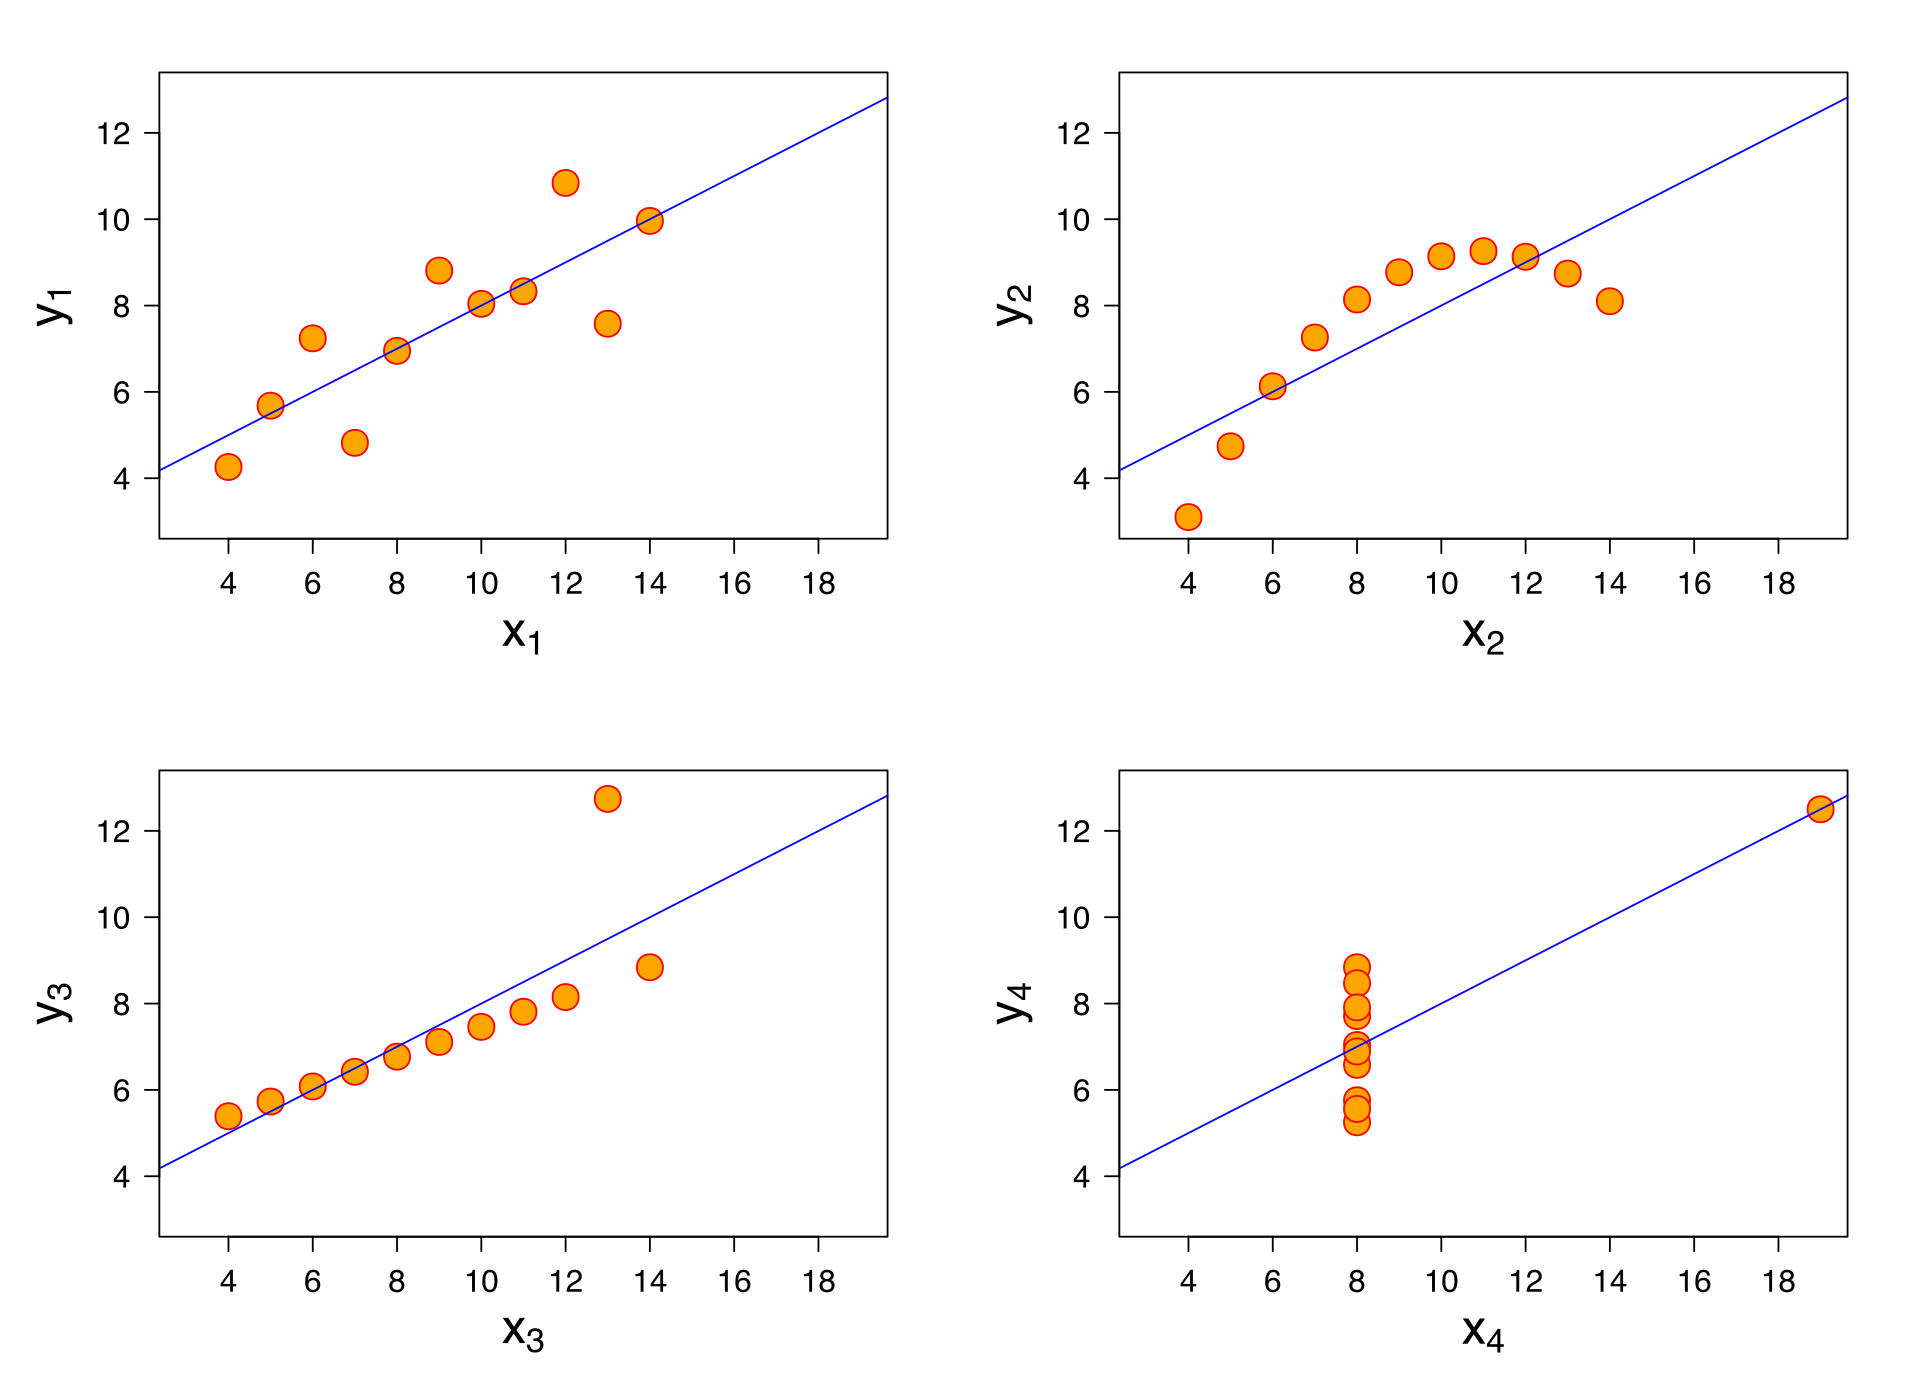

In [92]:
### Graphical Anscombe's_quartet

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - LR model\\"
Image(filename = PATH + "Anscombe's_quartet.png", width=900, height=900)


# identical descriptive statistics
# identical mean, std, variances, correlations, and regression lines

## What is Linear Regression Analysis (continued)
- A measurement of the relationship between 2 variables is the correlation coefficient; ranging from -1 to 1; the closer to 1 or -1, the stronger the relationship

- However, even if there seems to be a relationship, you should always be careful when modelling the relationship between 2 variables as correlation is not causation. For example, the rise of temperature vs Revenue.. (ice cream example)

- The mathematical equation of linear regression is Y = a + bX; where X is the independent variable and Y is the dependent variable. ‘b’ is the slope of the line and 'a' is the intercept; the value of y when x = 0

- The most common cost function used in linear regression is the “Least Squared Errors” function; which is the sum of squared errors (sum(y actuals – y predicted) ^ 2) over the training set; trying to minimize how far off the predictions are from the actuals.

- To calculate the “Least Squared Errors” firstly you must calculate the difference of the actual (y) vs the p(y); this is called the residuals.

- In order to find the least squared error you will have to find the optimal parameter values (b) that minimize the sum ‘S’ of squared residuals

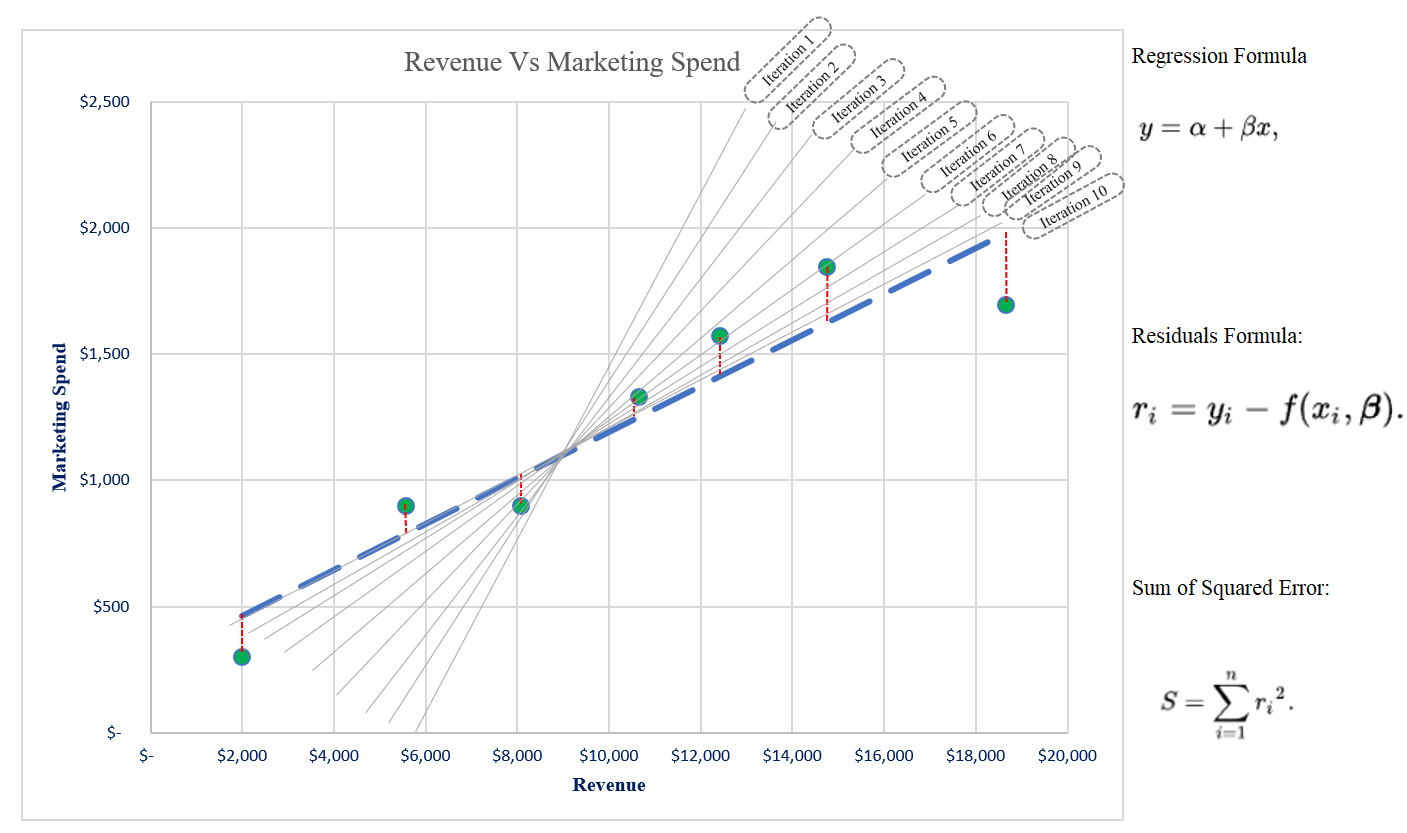

In [67]:
PATH = "F:\\Github\\Python tutorials\\Introduction to ML - LR model\\"
Image(filename = PATH + "Regression Example.png", width=900, height=900)

# 8. Running Linear Regression

In [93]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [94]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy  on the training dataset is:  0.9318255662222912
The Accuracy r2  on the training dataset prediction is:  0.9318255662222912

The Accuracy  on the testing dataset is:  0.8247350935155564

The RMSE  on the training dataset is:  2055.1996023307556
The RMSE  on the testing dataset is:  3495.5687090715846

The MAE  on the training dataset is:  1502.1342445912596
The MAE  on the testing dataset is:  2418.259819647835

Coefficients:  [375.223403 49.980585 -39.598371 583.472001 231.003268 4.727986
 -1719.351425 202.278843 -9761.603504 -6363.456916 -1216.264785 17.534555
 2.980697 -20.605172 171.139044 3157.357052 -2275.384940 -37.689427
 369.534191 -1213.816876 -492.821176 492.821176 124.412268 -124.412268
 -676.682688 -751.176719 1427.859408 -3653.529908 3653.529908 -667.939974
 689.659364 226.247529 5729.711799 -3072.010748 527.200669 -2775.442830
 -657.425810 -2789.433258 3283.250551 -2975.335571 1267.351716 1747.692867
 -6929.471245 6395.944940 5729.711799 -5729.711799]

Inte

In [76]:
new_raw_data.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0               4         130       3.47    2.68               9.0   
1               4         130       3.47    2.68               9.0   
2               6         152       2.68    3.47               9.0   
3               4         109       3.19    3.40              10.0   
4               5         136       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  carbody_convertible  \
0         111     5000       21          27  13495.0                    1   
1         111     5000       21          27  16500.0                    1   
2         154     5000       19          26  16500.0                    0   
3         102     5500       24          30  13950.0                    0   
4         115     5500       18          22  17450.0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                0               1   
1               1                 0                0               1   
2               1                 0                0               1   
3               1                 0                1               0   
4               1                 0                1               0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0               0               0               1                     1   
1               0               0               1                     1   
2               0               0               1                     1   
3               0               1               0                     1   
4               1               0               0                     1   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                1                 0             0   
1                0                1                 0             0   
2                0                0                 0             0   
3                0                0                 0             0   
4                0                0                 0             0   

   enginetype_oh

### Notes:
- The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

- The R Square is measure of how close the data are to the fitted regression line.

- In this case we can say that our model explains 93% of the training data & 85% of the testing data

- The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

- The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

- Coeff are the weights

- The intercept is the expected mean value of Y when all X=0

# Video Part 2

## 9. Trying Regression with less variables



In [96]:
final_fi['Variable'][0:10].values

array(['curbweight', 'carheight', 'wheelbase', 'horsepower', 'carlength',
       'boreratio', 'enginesize', 'compressionratio', 'highwaympg',
       'peakrpm'], dtype=object)

In [100]:
y2

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [97]:
# Split the data into X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8886586460418306
The RMSE  on the testing dataset is:  2786.112247787891
The MAE  on the testing dataset is:  2045.0313297332943


## 10. Trying the recursive feature elimination process

In [101]:
# with Linear Regression

from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]

# more info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [102]:
rfe_lr

Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')

In [103]:
# Split the data into X & y

test1 = rfe_lr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8226144299201712
The RMSE  on the testing dataset is:  3516.6528965468383
The MAE  on the testing dataset is:  2410.4047460752336


In [104]:
# With Support vector regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'compressionratio',
       'horsepower', 'citympg', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [105]:
# Split the data into X & y

test1 = rfe_svr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8933071005120908
The RMSE  on the testing dataset is:  2727.3326973721264
The MAE  on the testing dataset is:  2087.236816959342


### More info on feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

# 11. Trying other models

## 11.1. Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

The Accuracy  on the testing dataset is:  0.8780755290763865
The RMSE  on the testing dataset is:  2915.518491028241
The MAE  on the testing dataset is:  2129.754296476598


In [107]:
# Optimizing Random Forest R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.5min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [110]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=0)

In [111]:
best_grid = grid_search.best_estimator_

regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))


The Accuracy  on the testing dataset is:  0.8786155326699926
The RMSE  on the testing dataset is:  2909.0549092477513
The MAE  on the testing dataset is:  1641.6239400250126


## 11.2. XG Boost Regressor

In [112]:

from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

The Accuracy  on the testing dataset is:  0.943045908453219
The RMSE  on the testing dataset is:  1992.6582648025094
The MAE  on the testing dataset is:  1365.0997453982443


In [113]:
# optimizing XGBoost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
# grid search doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.8min finished


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 500}


In [242]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 12,
 'n_estimators': 500}

In [114]:
# Training the model on best parameters

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))


The Accuracy  on the testing dataset is:  0.9350173923901867
The RMSE  on the testing dataset is:  2128.4768335468075
The MAE  on the testing dataset is:  1301.5168516577744


## 11.3. Neural Network Regressor - MLPRegressor

In [115]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

The Accuracy  on the testing dataset is:  0.5776609379451173
The RMSE  on the testing dataset is:  5426.264831267777
The MAE  on the testing dataset is:  3579.124864131363


C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
# Optimising MLPR

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

regr = MLPRegressor(random_state=1, max_iter=500)

clf = GridSearchCV(regr, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Best parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [117]:
# Training the model on best parameters

regr = MLPRegressor(random_state=1, max_iter=500, activation='relu', alpha= 0.05, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')
regr.fit(X_train, y_train)


y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.18505622553601042
The RMSE  on the testing dataset is:  7537.619033499177
The MAE  on the testing dataset is:  5465.367204600928


C:\Users\pitsi\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Conclusions: XGBooster Regressor without optimization did the best job!

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into X & y

#del new_raw_data['Price Predictions']

X = new_raw_data.drop(['price', 'CarName'], axis = 1).values
X_columns = new_raw_data.drop(['price', 'CarName'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

(205, 47)
(205,)
(164, 47)
(41, 47)
(164,)
(41,)
The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [327]:
X_train.shape

(164, 47)

In [328]:
y_pred.shape

(164,)

C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

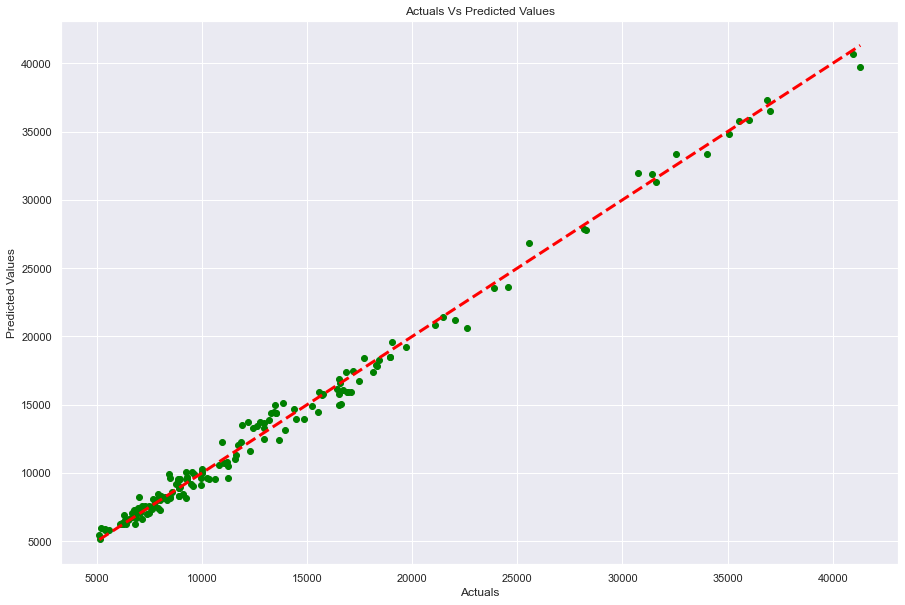

In [119]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

In [124]:
X_train

array([[0.000000, 102.000000, 191.700000, ..., 0.000000, 0.000000,
        1.000000],
       [2.000000, 97.300000, 171.700000, ..., 0.000000, 0.000000,
        1.000000],
       [0.000000, 97.200000, 172.000000, ..., 0.000000, 0.000000,
        1.000000],
       ...,
       [2.000000, 99.100000, 186.600000, ..., 0.000000, 0.000000,
        1.000000],
       [2.000000, 93.300000, 157.300000, ..., 0.000000, 0.000000,
        1.000000],
       [-1.000000, 109.100000, 188.800000, ..., 0.000000, 0.000000,
        1.000000]])

In [138]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)



(164, 50)
(41, 50)
(205, 50)


## 12. Joining the original dataset with the predictions

In [139]:

# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)

# Fixing the test df
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()


# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = raw_data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(164, 50)
(41, 50)
(205, 50)
(205, 28)


car_ID  symboling                       CarName fueltype aspiration  \
0       1          3        alfa-romero giulia - 1      gas        std   
1       2          3       alfa-romero stelvio - 2      gas        std   
2       3          1  alfa-romero Quadrifoglio - 3      gas        std   
3       4          2               audi 100 ls - 4      gas        std   
4       5          2                audi 100ls - 5      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0        two  convertible        rwd          front       88.6      168.8   
1        two  convertible        rwd          front       88.6      168.8   
2        two    hatchback        rwd          front       94.5      171.2   
3       four        sedan        fwd          front       99.8      176.6   
4       four        sedan        4wd          front       99.4      176.6   

   carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc           four         130   
1      64.1       48.8        2548       dohc           four         130   
2      65.5       52.4        2823       ohcv            six         152   
3      66.2       54.3        2337        ohc           four         109   
4      66.4       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price            Phase  Price Predictions  
0       21          27  13495.0    Existing data       14030.631995  
1       21          27  16500.0    Existing data       15868.214832  
2       19          26  16500.0  New unseen data       16644.131234  
3       24          30  13950.0    Existing data       13923.215678  
4       18          22  17450.0    Existing data       17130.875554

In [140]:
# 9.5. Exporting the data in a CSV
final_df4.to_csv('Car Predictions Output', sep='\t')

os. getcwd() 

'C:\\Users\\pitsi\\Desktop\\Python Tutorials\\2022 Python Tutorial\\2. Linear Regression'